## Загрузим нужные библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [ ]:
!pip3 install missingno
import missingno as msno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Хакатоны/Дагестан ДТП/train_dataset_train (1).csv")

In [ ]:
df

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0
2,490031781,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,NaN,NaN,NaN,NaN,0,0,0,0
3,490021246,11.05.2020,11:30:00,"Новгородская область, Новгородский район, Сави...",Вишнёвая ул,4,NaN,NaN,NaN,NaN,0,0,0,0
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,490049248,15.05.2019,07:35:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Столкновение,0,0,0,0
35767,490070258,15.10.2019,08:45:00,"Новгородская область, Великий Новгород",Пестовская ул,1,NaN,NaN,NaN,Столкновение,0,0,0,0
35768,490046086,10.03.2019,09:00:00,"Новгородская область, Старорусский район, Стар...",NaN,NaN,NaN,NaN,NaN,Наезд на стоящее ТС,0,0,0,0
35769,490007163,13.09.2020,05:40:00,"Новгородская область, Новгородский район",NaN,NaN,"""Россия"" Москва - Тверь - Великий Новгород - С...",544.0,870.0,NaN,0,0,0,0


In [ ]:
(df[df.columns[[-1, -2, -3, -4]]]).value_counts()

Ранено детей  Ранено  Погибло детей  Погибло
0             0       0              0          30993
              1       0              0           2918
              2       0              0            563
1             1       0              0            506
0             0       0              1            211
              3       0              0            141
1             2       0              0             91
2             2       0              0             43
1             3       0              0             38
0             1       0              1             38
              4       0              0             30
1             4       0              0             27
0             2       0              1             24
2             3       0              0             19
0             0       0              2             18
              5       0              0             17
2             4       0              0             15
0             3       0              

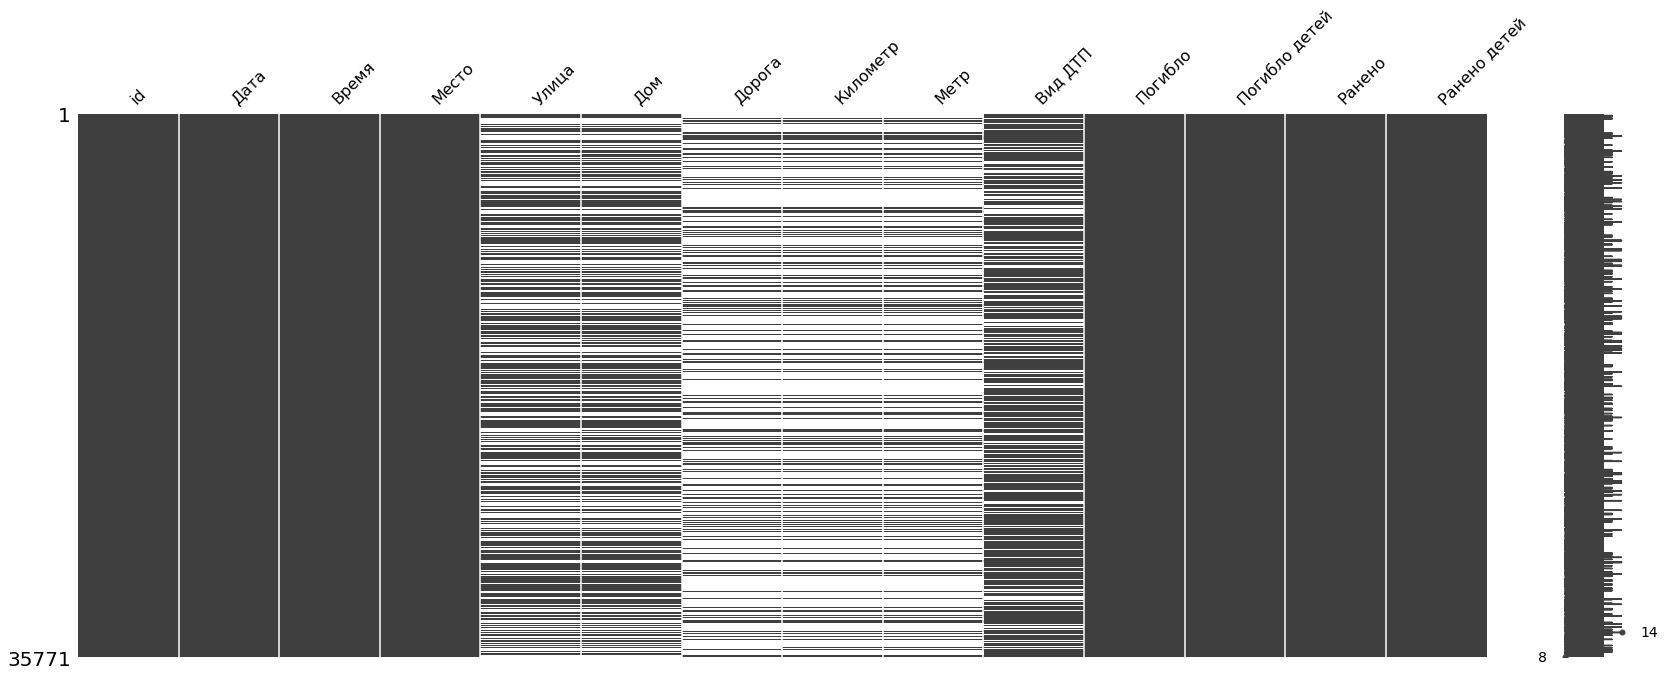

In [ ]:
msno.matrix(df, figsize = (28,10))

## Рассмотрим датасет по ближе

In [ ]:
df = df.dropna(subset=['Вид ДТП'])


In [ ]:
df.head()

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
0,490103984,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0
1,490097169,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0
6,490070711,11.10.2019,18:55:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0
8,490034352,01.03.2019,12:45:00,"Новгородская область, Чудовский район",NaN,NaN,"""Россия"" Москва - Тверь - Великий Новгород - С...",573.0,700.0,Наезд на препятствие,0,0,0,0


In [ ]:
df.shape

(25555, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25555 entries, 0 to 35770
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25555 non-null  int64  
 1   Дата           25555 non-null  object 
 2   Время          25555 non-null  object 
 3   Место          25555 non-null  object 
 4   Улица          15079 non-null  object 
 5   Дом            15207 non-null  object 
 6   Дорога         7202 non-null   object 
 7   Километр       7199 non-null   float64
 8   Метр           7199 non-null   float64
 9   Вид ДТП        25555 non-null  object 
 10  Погибло        25555 non-null  int64  
 11  Погибло детей  25555 non-null  int64  
 12  Ранено         25555 non-null  int64  
 13  Ранено детей   25555 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 2.9+ MB


Заменим все пропуски в данных

In [ ]:
df.fillna(method='ffill', inplace=True)
df = df.dropna()
# df = df.fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",Большая Санкт-Петербургская ул,73,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0
6,490070711,11.10.2019,18:55:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Столкновение,0,0,0,0
8,490034352,01.03.2019,12:45:00,"Новгородская область, Чудовский район",Большая Санкт-Петербургская ул,88,"""Россия"" Москва - Тверь - Великий Новгород - С...",573.0,700.0,Наезд на препятствие,0,0,0,0
11,490058885,14.08.2019,17:30:00,"Новгородская область, Холмский район, Холм",Советский пер,16,"""Россия"" Москва - Тверь - Великий Новгород - С...",573.0,700.0,Наезд на препятствие,0,0,0,0
12,490094161,03.04.2018,12:25:00,"Новгородская область, Великий Новгород",Советский пер,16,"""Россия"" Москва - Тверь - Великий Новгород - С...",573.0,700.0,Столкновение,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35765,490037874,01.02.2019,00:45:00,"Новгородская область, Боровичский район, Боровичи",Розважа ул,13/11,Устюжна - Мочала,137.0,500.0,Наезд на животное,0,0,0,0
35766,490049248,15.05.2019,07:35:00,"Новгородская область, Великий Новгород",Розважа ул,13/11,Устюжна - Мочала,137.0,500.0,Столкновение,0,0,0,0
35767,490070258,15.10.2019,08:45:00,"Новгородская область, Великий Новгород",Пестовская ул,1,Устюжна - Мочала,137.0,500.0,Столкновение,0,0,0,0
35768,490046086,10.03.2019,09:00:00,"Новгородская область, Старорусский район, Стар...",Пестовская ул,1,Устюжна - Мочала,137.0,500.0,Наезд на стоящее ТС,0,0,0,0


Добавим пару новых столбцов

In [ ]:
df["День"] = df["Дата"].str[:2]
df["Месяц"] = df["Дата"].str[3:5]
df["Час"] = df["Время"].str[:2]

In [ ]:
df.head(3)

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей,День,Месяц,Час
4,490041585,09.01.2019,01:45:00,"Новгородская область, Окуловский район",Большая Санкт-Петербургская ул,73,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0,09,01,01
6,490070711,11.10.2019,18:55:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Столкновение,0,0,0,0,11,10,18
8,490034352,01.03.2019,12:45:00,"Новгородская область, Чудовский район",Большая Санкт-Петербургская ул,88,"""Россия"" Москва - Тверь - Великий Новгород - С...",573.0,700.0,Наезд на препятствие,0,0,0,0,01,03,12


Сделаем категории **"Вид ДТП"** и **"Улица"** раноговыми 

In [ ]:
df["Вид ДТП"] = pd.Categorical(df["Вид ДТП"])
df["Вид ДТП"].astype('category').cat.codes
df["Вид ДТП"] = df["Вид ДТП"].cat.codes

In [ ]:
df["Улица"] = pd.Categorical(df["Улица"])
df["Улица"].astype('category').cat.codes
df["Улица"] = df["Улица"].cat.codes

Пострим на распределение данных

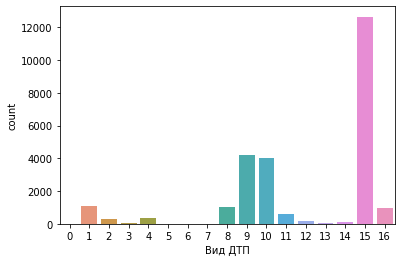

In [ ]:
sns.countplot(x = "Вид ДТП" , data  = df)  

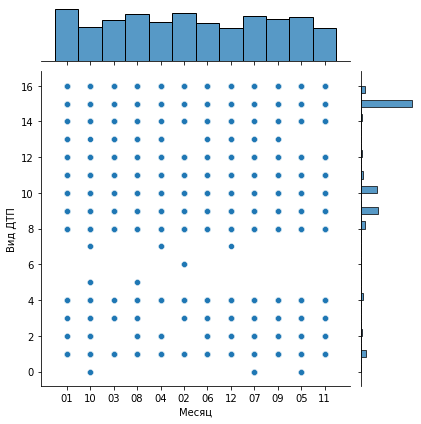

In [ ]:
sns.jointplot(x = 'Месяц', y = "Вид ДТП" , data = df)

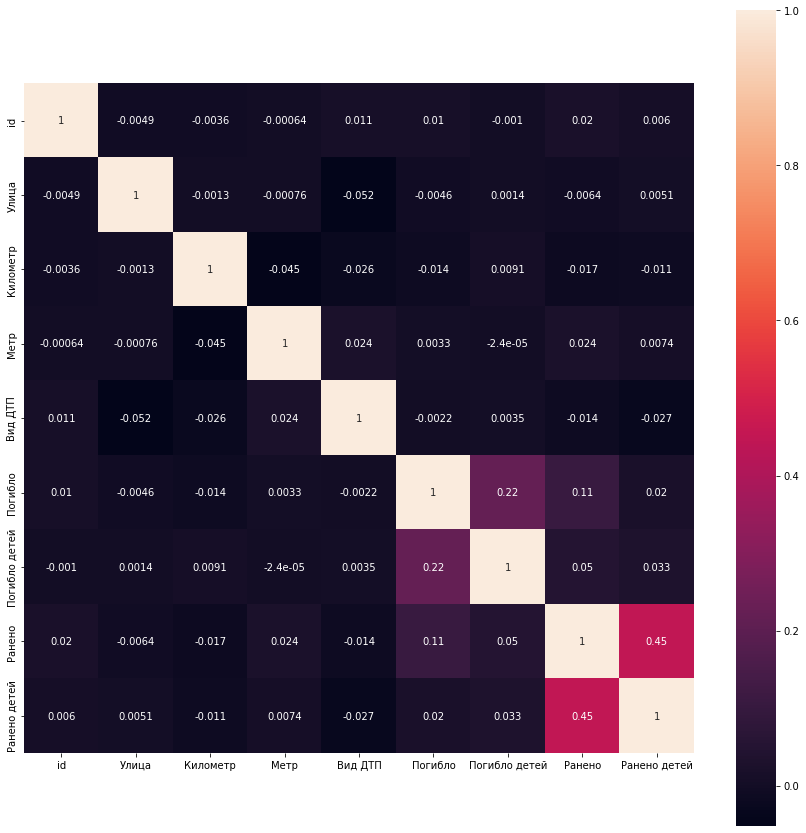

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [ ]:
df["День"] = df["День"].astype('int')
df["Месяц"] = df["Месяц"].astype('int')
df["Час"] = df["Час"].astype('int')

заменим наны на медиану

In [ ]:
# df['Километр'] = df['Километр'].fillna(df['Километр'].median())
# df['Метр'] = df['Метр'].fillna(df['Метр'].median())

# Закодируем призаки

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
mass_object = df.dtypes[df.dtypes == "object"].index.values
mass_object

array(['Дата', 'Время', 'Место', 'Дом', 'Дорога'], dtype=object)

In [ ]:
obj = ['Место', 'Дом', 'Дорога']

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(df[obj])

OrdinalEncoder()

In [ ]:
df[obj] = encoder.transform(df[obj])

# Матрица корреляции

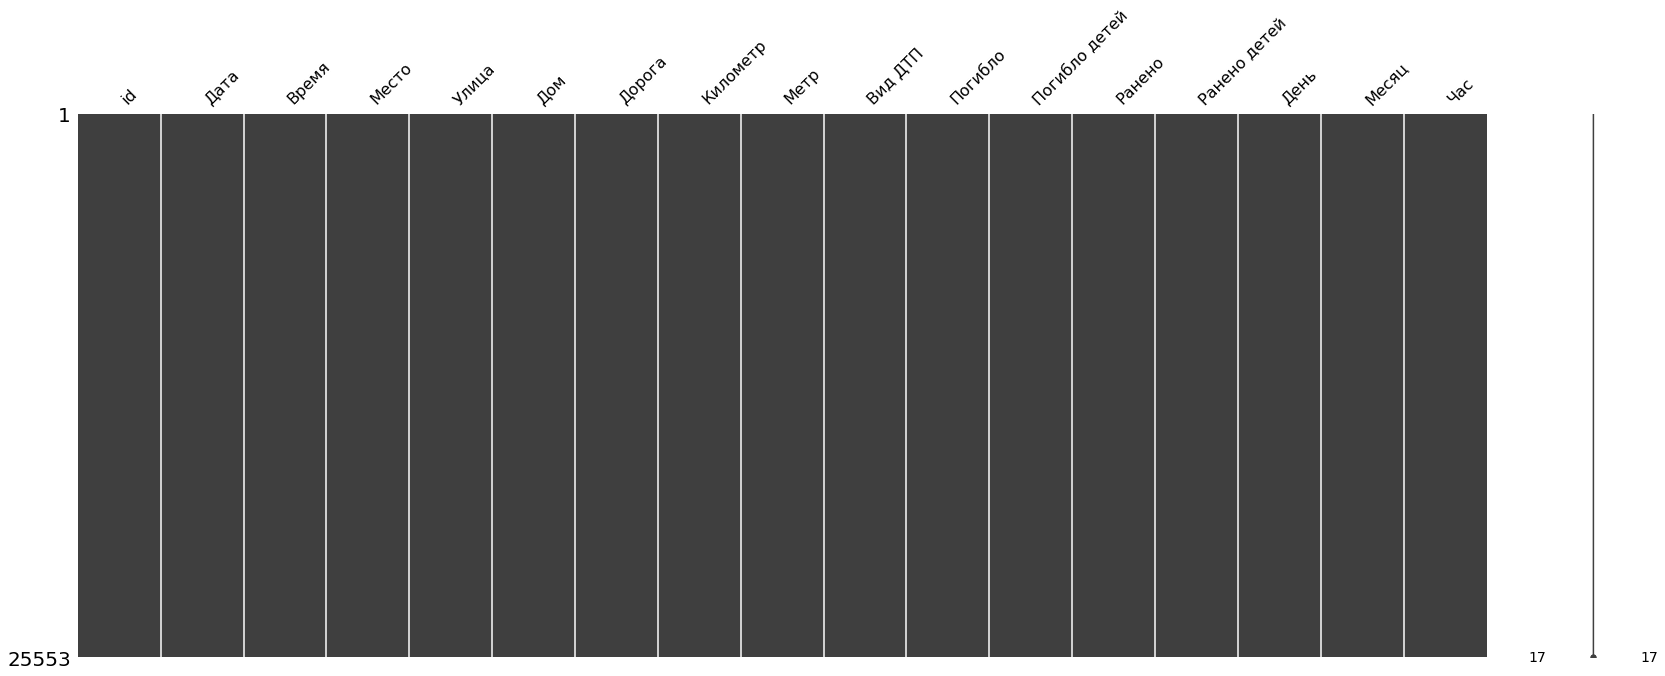

In [ ]:
msno.matrix(df, figsize = (28,10))

In [ ]:
X = df.drop(["Дата", "Время", "id", "Погибло",	"Погибло детей",	"Ранено",	"Ранено детей"], axis = 1)
y = df[["Погибло",	"Погибло детей",	"Ранено",	"Ранено детей"]]

In [ ]:
X['Километр'] = X['Километр'].astype('int64')

In [ ]:
X

,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,День,Месяц,Час
4,210.0,55,820.0,88.0,430,5.0,1,9,1,1
6,65.0,55,874.0,88.0,430,5.0,15,11,10,18
8,311.0,55,874.0,1.0,573,700.0,9,1,3,12
11,310.0,433,217.0,1.0,573,700.0,9,14,8,17
12,65.0,433,217.0,1.0,573,700.0,15,3,4,12
...,...,...,...,...,...,...,...,...,...,...
35765,10.0,408,147.0,134.0,137,500.0,4,1,2,0
35766,65.0,408,147.0,134.0,137,500.0,15,15,5,7
35767,65.0,357,4.0,134.0,137,500.0,15,15,10,8
35768,293.0,357,4.0,134.0,137,500.0,10,10,3,9


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Посмотрим важность признаков

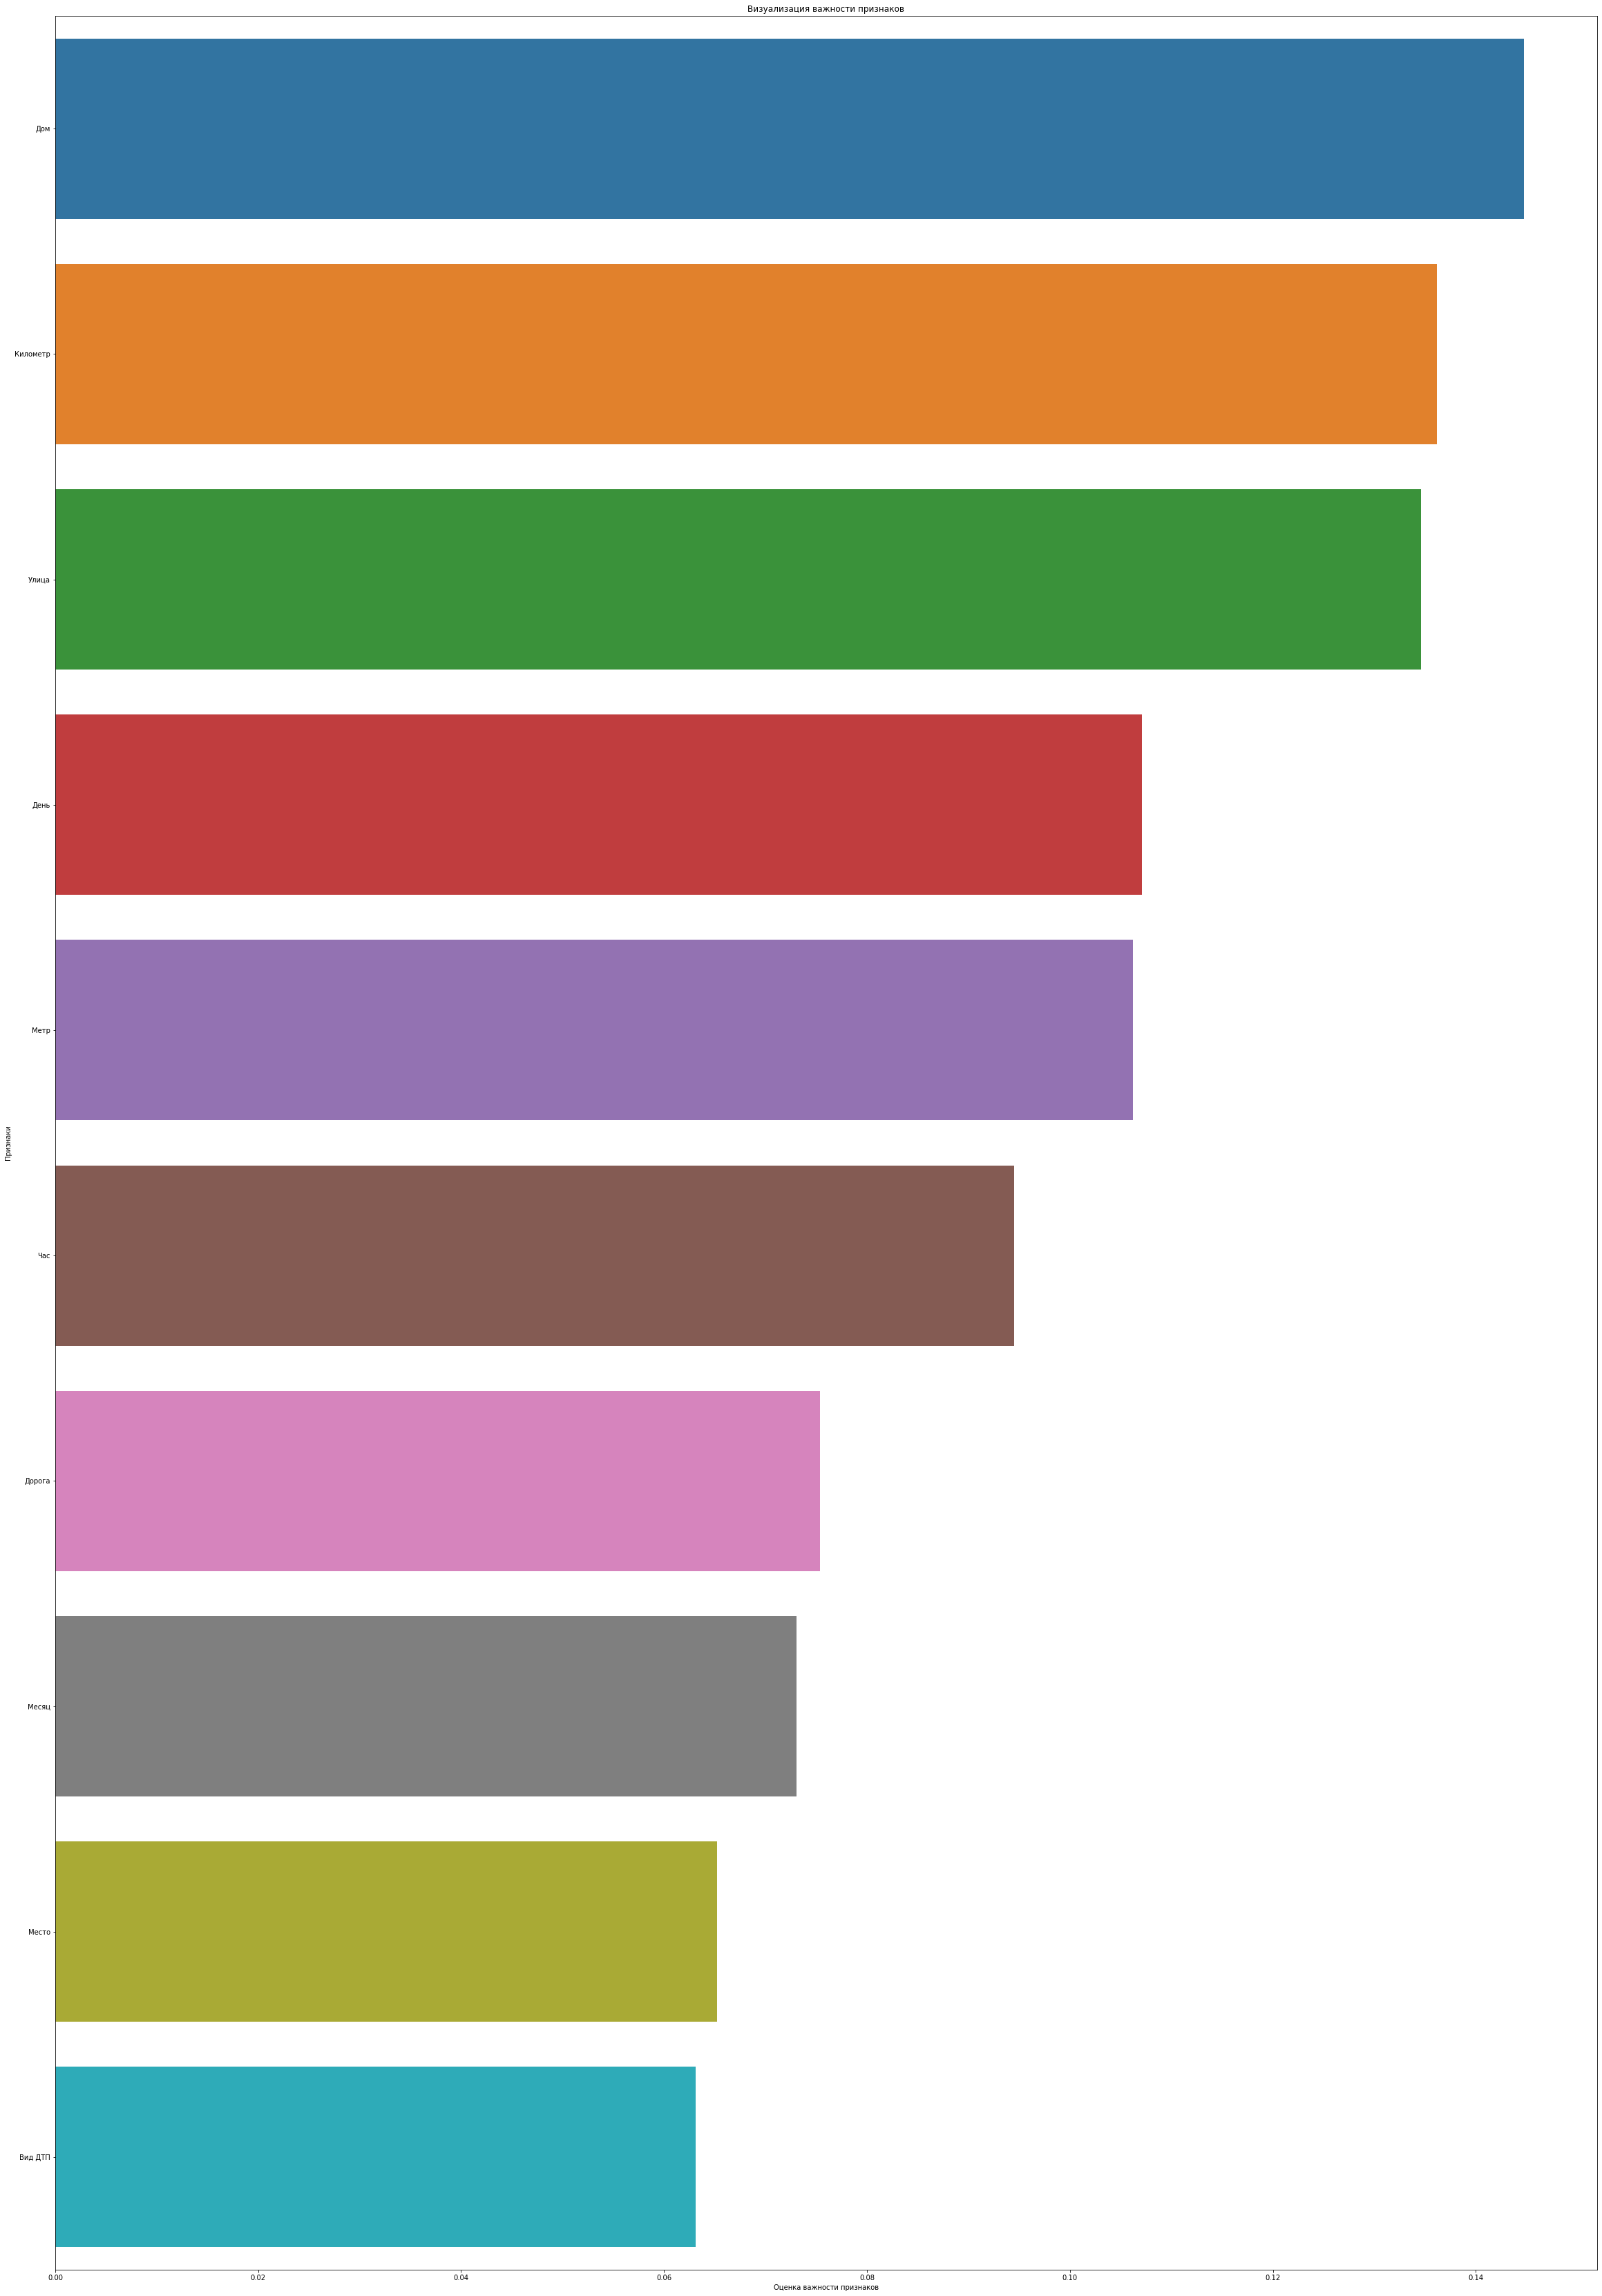

<Figure size 720x1440 with 0 Axes>

In [ ]:
model_l = RandomForestClassifier().fit(X_train, y_train)
import seaborn as sns
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=X_valid.columns).sort_values(ascending=False)
    plt.figure(figsize=(40, 60))

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')
    _ = plt.figure(figsize=(10, 20))

chart_feature_imp(model_l)

## Обучение модели

*RFC*

In [ ]:
clf = RandomForestClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

*SGD*

In [ ]:
# sgd = SGDClassifier()
# model_1 = sgd.fit(X_train, y_train['Погибло'])
# model_2 = sgd.fit(X_train, y_train['Погибло детей'])
# model_3 = sgd.fit(X_train, y_train['Ранено'])
# model_4 = sgd.fit(X_train, y_train['Ранено детей'])

*RFC с подбором параметров*

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f = ['auto', 'sqrt', 'log2']
best_result = 0
best_model = None
for depth in range(1, 30):
    for estimators in range (1, 5):
        for features in f:
            model = RandomForestClassifier(max_depth=depth, n_estimators=estimators, max_features=features, random_state=12345)
            model.fit(X_train, y_train)
            pred = model.predict(X_valid)
            score = 0 
            score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
            score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
            score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
            score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
            result = score/4
            if result > best_result:
                best_result = result
                best_model = model
print(best_result)
print(best_model)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

0.2877495843432384
RandomForestClassifier(max_depth=17, n_estimators=1, random_state=12345)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*DTR*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

*DTR с параметрами*

In [ ]:
best_result = 0
best_model = None
for depth in range(1, 300):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    score = 0 
    score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
    score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
    score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
    score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
    result = score/4
    if result > best_result:
        best_result = result
        best_model = model
print(best_result)
print(best_model)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and 

0.2842996199141655
DecisionTreeClassifier(max_depth=13, random_state=12345)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Оценка точности

*RFC*

In [ ]:
pred = clf.predict(X_valid)

In [ ]:
from sklearn.metrics import recall_score

score = 0 

score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Recall score:", score/4)

Recall score: 0.2657673617815925


*RFC с параметрами*

In [ ]:
pred = best_model.predict(X_valid)

In [ ]:
score = 0 

score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

In [ ]:
print("Recall score:", score/4)

Recall score: 0.2842996199141655


*DTR*

In [ ]:
pred = dtr.predict(X_valid)
score = 0 
score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')
print("Recall score:", score/4)

Recall score: 0.2656187651224947


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*SGD*

In [ ]:
# pred = lr.predict(X_valid)
# y_valid

In [ ]:
# from sklearn.metrics import recall_score

# score = 0 

# score += recall_score(y_valid["Погибло"], pred[:,0], average='macro')
# score += recall_score(y_valid["Погибло детей"], pred[:,1], average='macro')
# score += recall_score(y_valid["Ранено"], pred[:,2], average='macro')
# score += recall_score(y_valid["Ранено детей"], pred[:,3], average='macro')

# Текст

In [ ]:
test_1 = pd.read_csv('/content/drive/MyDrive/Хакатоны/Дагестан ДТП/test_dataset_test (1).csv')

In [ ]:
test = test_1

In [ ]:
test["День"] = test["Дата"].str[:2]
test["Месяц"] = test["Дата"].str[3:5]
test["Час"] = test["Время"].str[:2]

In [ ]:
test["Вид ДТП"] = pd.Categorical(test["Вид ДТП"])
test["Вид ДТП"].astype('category').cat.codes
test["Вид ДТП"] = test["Вид ДТП"].cat.codes

In [ ]:
test["Улица"] = pd.Categorical(test["Улица"])
test["Улица"].astype('category').cat.codes
test["Улица"] = test["Улица"].cat.codes

In [ ]:
test["День"] = test["День"].astype('int')
test["Месяц"] = test["Месяц"].astype('int')
test["Час"] = test["Час"].astype('int')

In [ ]:
obj = ['Место', 'Дом', 'Дорога']

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(test[obj])

OrdinalEncoder()

In [ ]:
test[obj] = encoder.transform(test[obj])

In [ ]:
test = test.drop(["Дата", "Время", "id"], axis = 1)


In [ ]:
test = test.fillna(0)

*Тест RFC*

In [ ]:
pred = clf.predict(test)
w = pd.DataFrame(columns=['Погибло',	'Погибло детей',	'Ранено',	'Ранено детей'], data = pred, index=test_1['id'])
w.rename_axis('id').reset_index()
w.to_csv('./rfc.csv')

*RFC тест с параметрами*

In [ ]:
pred = best_model.predict(test)
w = pd.DataFrame(columns=['Погибло',	'Погибло детей',	'Ранено',	'Ранено детей'], data = pred, index=test_1['id'])
w.rename_axis('id').reset_index()
w.to_csv('./rfc_p.csv')